# AI Machine Learning Practice 

# Informations

- 20186795 Handongmin
- 개요를 보시면 순서 및 알고리즘의 적용요소를 파악할 수 있습니다.
- 하이퍼파라미터, 여러 개의 모델링 분석은 큰 시간이 소요되니 주석처리하였습니다. 

## [Step 0] Importing Packages

You must specify all the packages you use in this practice in the cell below.



In [324]:
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

## [Step 1] Read Data

Train dataset is in the 'data' directory


In [325]:
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib

import matplotlib.pyplot as plt
# Import the data using the file path
filepath1 = os.sep.join(data_path + ['music_train_data.csv'])
data = pd.read_csv(filepath1)
filepath2 = os.sep.join(data_path + ['music_test_data.csv'])
test_data = pd.read_csv(filepath2)

In [326]:
data.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f340,f341,f342,f343,f344,f345,f346,f347,f348,answer
0,-0.166614,0.284691,-0.011022,-1.028812,0.101653,0.498247,-0.314566,1.208697,-1.503008,-1.457764,...,2.136721,-1.193955,0.040614,1.127366,0.741521,-0.707730,0.077748,0.832992,-1.291423,2
1,-0.583950,0.651829,-1.754836,-0.512545,-1.063596,1.434039,-1.404162,-0.745222,0.054440,0.153028,...,-0.803444,-0.327357,1.022505,-1.083422,-0.714399,-1.407135,0.846917,-1.562645,0.365577,1
2,-0.214595,0.353967,0.749125,-0.123296,-0.809340,0.042847,-0.688971,-0.741502,0.059323,0.995969,...,0.423848,-0.200293,-0.265410,-1.182842,-0.416810,0.234092,-1.061020,-1.595486,-0.867771,1
3,-0.044177,0.151251,1.017266,-0.809429,-0.558230,-0.649047,-0.790528,-0.798548,1.471307,0.045307,...,0.601954,-0.092321,-1.319499,-0.673082,-0.816716,-4.172430,1.093709,1.106629,0.476974,1
4,0.779536,-0.761447,0.138536,2.406821,0.735203,-0.058044,0.358249,1.027844,-0.043828,-1.221248,...,-0.673082,-0.100535,-0.623208,1.571379,0.270780,-0.792427,-0.402796,1.349432,0.174976,2


In [327]:
print(data.shape)
print(data.dtypes)

(650, 349)
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
           ...   
f345      float64
f346      float64
f347      float64
f348      float64
answer      int64
Length: 349, dtype: object


In [328]:
#모든 결측치의 합을 더함. 결측치가 없는 것을 확인할 수 있음.
pd.isnull(data).sum().sum()

0

In [329]:
data['answer'].describe()

count    650.000000
mean       1.596923
std        0.684850
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: answer, dtype: float64

## [Step 2] Data Preprocessing

- 먼저 label 부터 분석했습니다. 그 후 상관계수, 편향도, 정규화, 결측치 처리, feature selection으로 진행됩니다.
- 각각에 단계마다 마크다운을 통해 설명하였습니다.
- transform function과 같은 경우, 모델링이후 최종모델을 선정할 때 정의했습니다.!

아래의 그림을 통해 3번 class 의 개수가 적은 것을 확인.

/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='answer', ylabel='count'>

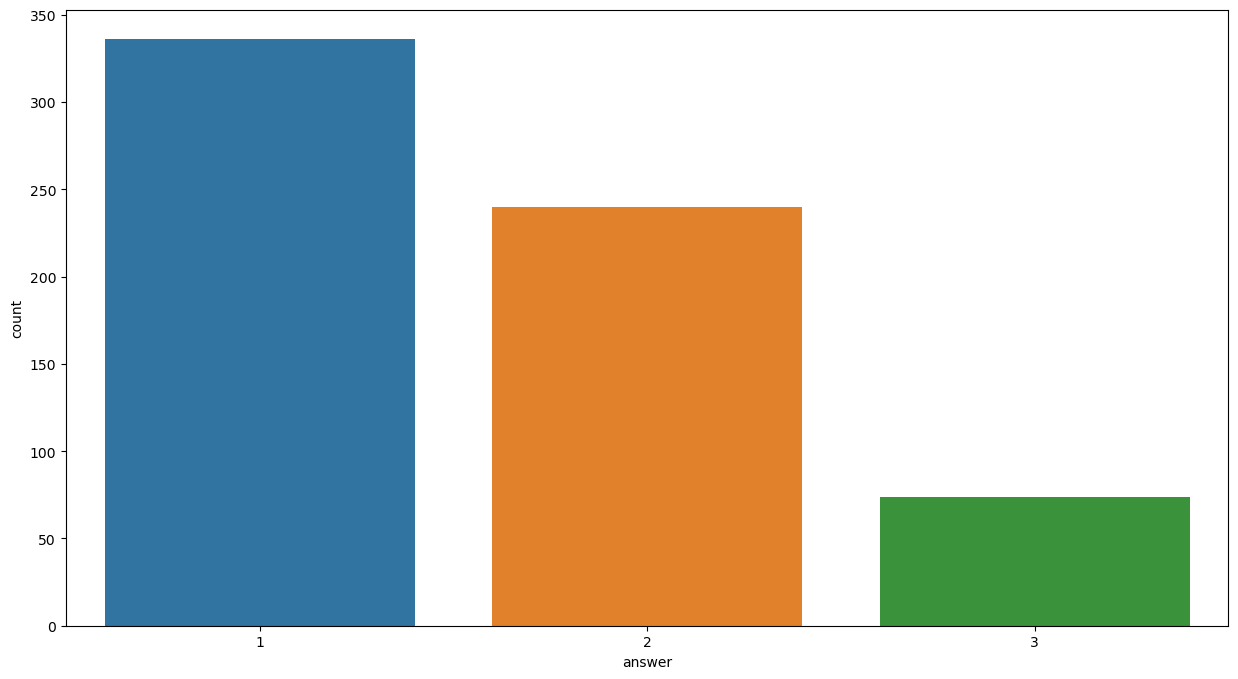

In [330]:
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(data['answer'])

#### 상관계수 분석

In [331]:
#내림차순으로 상관계수를 정렬한 후, 상위 10개의 Feature 확인
answer_corr = data.corr().abs()[-1:].unstack()
answer_corr.sort_values(kind="quicksort", ascending=False)[:31]

answer  answer    1.000000
f55     answer    0.528829
f25     answer    0.499611
f29     answer    0.483143
f53     answer    0.479233
f63     answer    0.470994
f35     answer    0.465304
f77     answer    0.459385
f49     answer    0.456644
f21     answer    0.446106
f309    answer    0.432933
f40     answer    0.422038
f39     answer    0.421808
f320    answer    0.419074
f59     answer    0.417458
f316    answer    0.414389
f45     answer    0.412193
f36     answer    0.401344
f347    answer    0.384805
f31     answer    0.378770
f153    answer    0.361140
f313    answer    0.332036
f343    answer    0.331786
f69     answer    0.281474
f310    answer    0.280139
f330    answer    0.254111
f323    answer    0.253777
f10     answer    0.250951
f286    answer    0.248008
f287    answer    0.245661
f80     answer    0.242606
dtype: float64

In [332]:
data_corr = data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
data_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
data_corr.drop(data_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = data_corr.drop(data_corr[data_corr['Correlation Coefficient'] == 1.0].index)

아래의 코드를 통해, feature 간에 상관계수는 몇몇개는 상당히 높다는 것을 확인할 수 있다. 상관계수가 1의 가까운 데이터는 중복으로 들어갈 필요가 없음.

In [333]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.5
#print(df_train_corr_nd.count)
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
348,f65,f66,0.999182
350,f245,f167,0.992357
352,f247,f169,0.991502
354,f246,f168,0.991359
356,f166,f244,0.991123
...,...,...,...
3314,f169,f49,0.500367
3316,f333,f173,0.500343
3318,f284,f25,0.500327
3320,f8,f217,0.500247


#### 편향도 확인 및 처리

상위10개의 편향도 확인 -> 상당히 높은 것을 확인할 수 있음. 

In [334]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
top_10_index = skewed_feats.sort_values(ascending=False)[:10]
print(top_10_index)
top_10_index = top_10_index.index



f65     25.295412
f66     25.096269
f13      9.453152
f116     5.048910
f14      5.025909
f28      4.898928
f203     4.161365
f202     4.017091
f195     3.938446
f200     3.505070
dtype: float64


/var/folders/w7/s0fpj10s56vggmksv5380b8r0000gn/T/ipykernel_1699/1606099996.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness


log 를 통해 어느정도 편향도가 해소되는 것을 확인할 수 있다.

/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


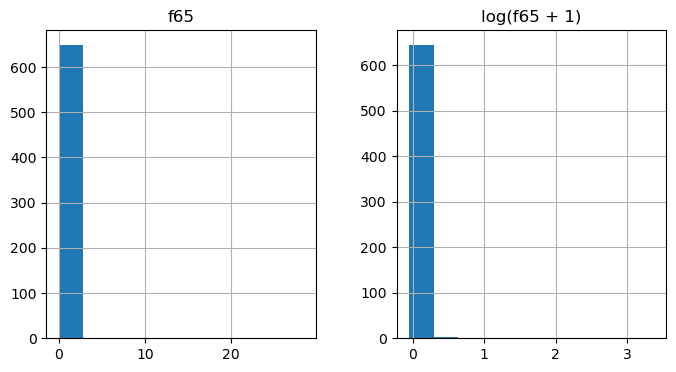

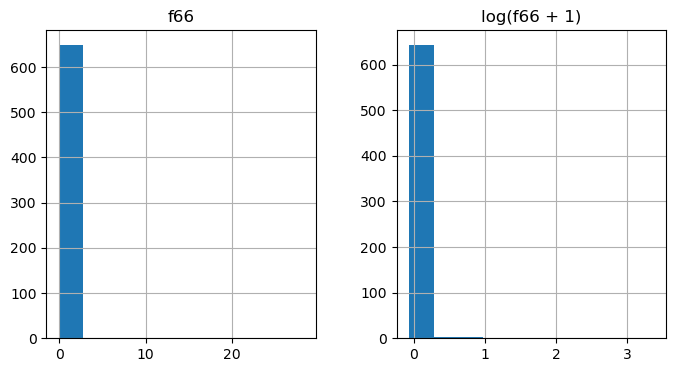

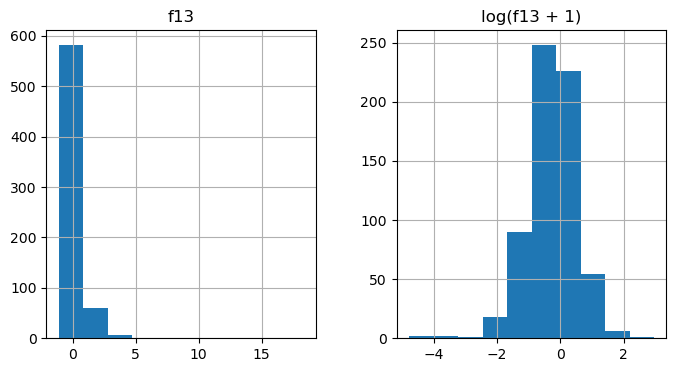

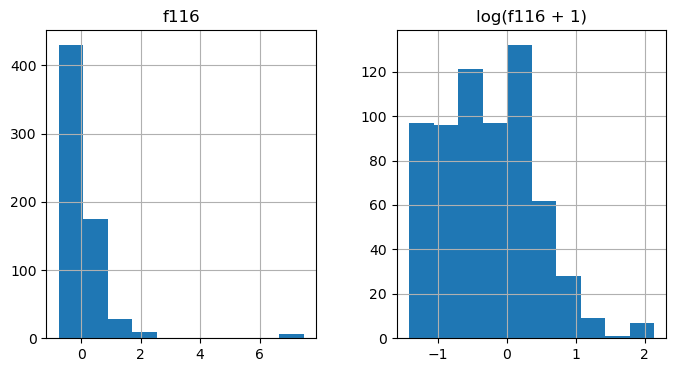

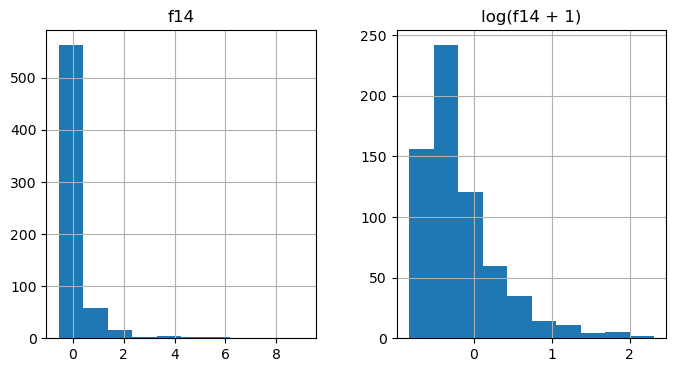

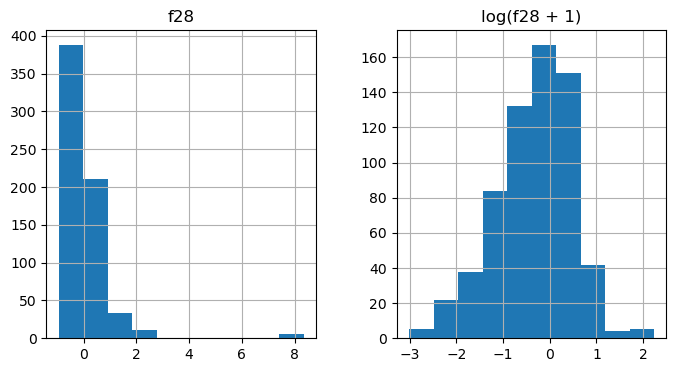

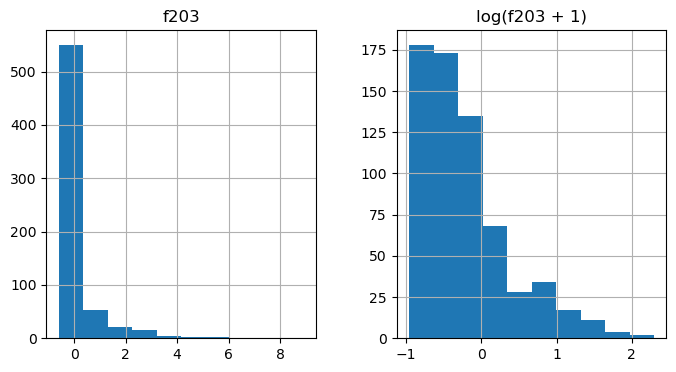

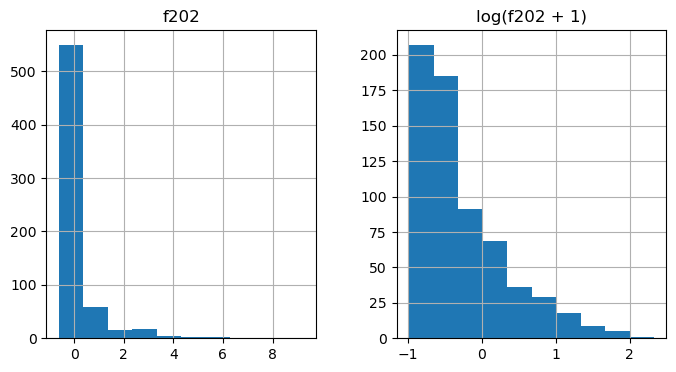

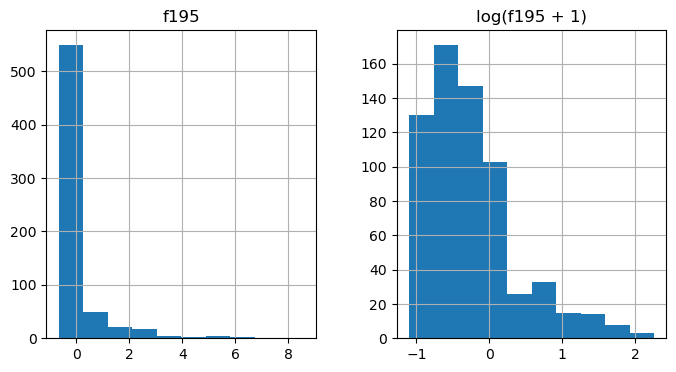

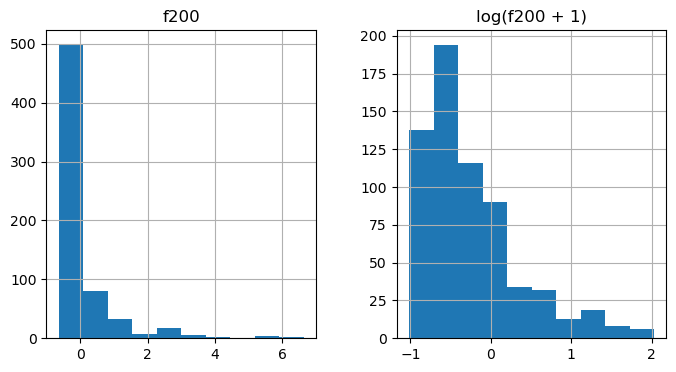

In [335]:
for i in top_10_index:
    matplotlib.rcParams['figure.figsize'] = (8.0, 4.0)
    prices = pd.DataFrame({ i:data[i], "log(" + i + " + 1)":np.log1p(data[i])})
    prices.hist() 

Log(x + 1)로 변형한 결과 Top10의 편향도는 물론이고, 전체적인 편향도가 낮아진 것을 확인할 수 있다.

In [336]:
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75].index

for i in skewed_feats:
    data[i] = np.log1p(data[i])

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna()))
print(skewed_feats.sort_values(ascending=False)[:10])

f65     20.720429
f66     17.661339
f14      1.703379
f277     1.405559
f204     1.401090
f203     1.398109
f202     1.396626
f200     1.371888
f278     1.346244
f274     1.343837
dtype: float64


/var/folders/w7/s0fpj10s56vggmksv5380b8r0000gn/T/ipykernel_1699/1438131618.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna()))


#### 정규화

데이터의 분포도를 확인해보면, 각 feature마다 큰 차이가 없는 것을 확인할 수 있다. -> 평균은 대부분 0, std또한 1의 근접.

In [337]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f340,f341,f342,f343,f344,f345,f346,f347,f348,answer
count,544.000000,650.000000,650.000000,544.000000,547.000000,556.000000,541.000000,620.000000,650.000000,650.000000,...,650.000000,544.000000,650.000000,650.000000,590.000000,650.000000,546.000000,650.000000,650.000000,650.000000
mean,0.049959,0.008584,0.008183,-0.159057,0.131531,0.114346,-0.028488,-0.389138,-0.031464,-0.005901,...,-0.454994,-0.155701,0.009903,0.019381,-0.215628,0.006140,-0.184174,0.016084,-0.000650,1.596923
std,0.886601,1.009757,1.003693,1.041801,0.697176,0.632349,0.916207,1.072816,0.977971,0.989498,...,0.983825,1.043385,1.023392,0.990331,0.950139,1.013217,1.056148,0.988036,0.996245,0.684850
min,-5.287954,-2.607772,-3.092074,-5.460866,-3.910763,-3.545955,-5.042234,-5.775964,-2.947241,-2.328078,...,-1.900670,-4.684804,-3.130989,-2.640227,-5.769875,-4.172430,-6.540563,-3.482437,-3.877779,1.000000
25%,-0.225271,-0.741285,-0.641448,-0.591319,-0.054762,-0.112118,-0.364294,-1.065957,-0.640792,-0.511622,...,-1.419505,-0.653688,-0.626120,-0.752772,-0.712508,-0.630762,-0.604545,-0.591307,-0.589563,1.000000
50%,0.341539,-0.085561,-0.125059,0.092319,0.298099,0.255167,0.202706,-0.273678,-0.079813,0.198814,...,-0.582017,0.055568,-0.113994,-0.163300,-0.082158,-0.013306,-0.081810,0.092563,0.076969,1.000000
75%,0.613864,0.691273,0.626981,0.482954,0.578134,0.510920,0.444123,0.391172,0.454957,0.662861,...,0.435843,0.590115,0.556908,0.870034,0.406527,0.701104,0.613518,0.753586,0.660879,2.000000
max,1.040288,2.765171,3.551567,1.862988,0.943586,1.109980,1.671413,2.198019,3.929802,2.805231,...,1.777601,1.716525,2.938023,3.782052,1.990313,3.108610,1.694336,2.049950,3.263902,3.000000


In [338]:
## 정규화적용유무는 모델링에 대한 acc값을 통해 판단하려고 합니다.
import warnings
warnings.filterwarnings('ignore', module='sklearn')
msc = MinMaxScaler()
def transform_test(X_test_data):
    X_test_data = msc.transform(X_test_data)
    return X_test_data

#### 결측치 처리

In [339]:
pd.isnull(data).sum()

f1        106
f2          0
f3          0
f4        106
f5        103
         ... 
f345        0
f346      104
f347        0
f348        0
answer      0
Length: 349, dtype: int64

In [340]:
data = data.fillna(data.mean())

/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


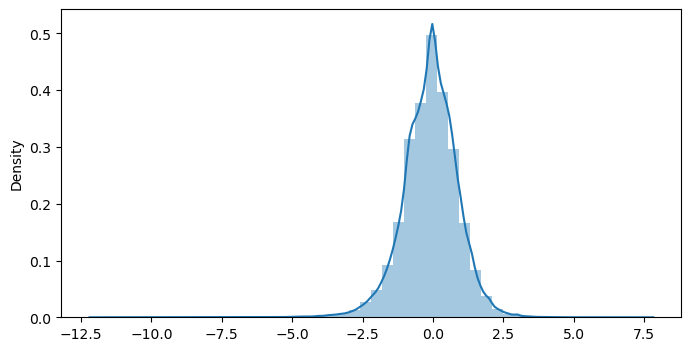

In [341]:
#데이터의 분포가 정규분포꼴임을 확인가능합니다.
sns.distplot(data)
plt.show()

In [342]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f340,f341,f342,f343,f344,f345,f346,f347,f348,answer
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.049959,0.008584,0.008183,-0.159057,0.131531,0.114346,-0.028488,-0.389138,-0.031464,-0.005901,...,-0.454994,-0.155701,0.009903,0.019381,-0.215628,0.006140,-0.184174,0.016084,-0.000650,1.596923
std,0.810972,1.009757,1.003693,0.952933,0.639464,0.584764,0.835734,1.047727,0.977971,0.989498,...,0.983825,0.954382,1.023392,0.990331,0.905154,1.013217,0.967834,0.988036,0.996245,0.684850
min,-5.287954,-2.607772,-3.092074,-5.460866,-3.910763,-3.545955,-5.042234,-5.775964,-2.947241,-2.328078,...,-1.900670,-4.684804,-3.130989,-2.640227,-5.769875,-4.172430,-6.540563,-3.482437,-3.877779,1.000000
25%,-0.098128,-0.741285,-0.641448,-0.484102,0.054695,-0.028123,-0.210588,-1.026805,-0.640792,-0.511622,...,-1.419505,-0.458475,-0.626120,-0.752772,-0.581117,-0.630762,-0.515496,-0.591307,-0.589563,1.000000
50%,0.186818,-0.085561,-0.125059,-0.159057,0.208806,0.186913,0.081581,-0.364858,-0.079813,0.198814,...,-0.582017,-0.155701,-0.113994,-0.163300,-0.178399,-0.013306,-0.184174,0.092563,0.076969,1.000000
75%,0.570595,0.691273,0.626981,0.411601,0.530153,0.468162,0.394874,0.368694,0.454957,0.662861,...,0.435843,0.496942,0.556908,0.870034,0.339754,0.701104,0.499036,0.753586,0.660879,2.000000
max,1.040288,2.765171,3.551567,1.862988,0.943586,1.109980,1.671413,2.198019,3.929802,2.805231,...,1.777601,1.716525,2.938023,3.782052,1.990313,3.108610,1.694336,2.049950,3.263902,3.000000


#### Feature selection
- laaso 모델을 통해, Feature들의 중요도를 파악함.

In [343]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LassoCV

In [344]:
features = data.columns[:-1]
X_data = data[features]
y_data = data['answer']
data.head(1)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f340,f341,f342,f343,f344,f345,f346,f347,f348,answer
0,-0.182258,0.284691,-0.011022,-0.159057,0.096812,0.404296,-0.377703,0.792403,-1.503008,-1.457764,...,1.143178,-0.155701,0.040614,1.127366,0.554759,-0.70773,0.074874,0.832992,-1.291423,2


In [345]:
alphas = [1, 0.5, 0.1, 0.01, 0.005 ,0.001, 0.0005,0.0001]
model_lasso = LassoCV(alphas=alphas,
                  max_iter=5e4,
                  cv=3).fit(X_data, y_data)

In [346]:
coef = pd.Series(model_lasso.coef_, index = X_data.columns)

In [347]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 145 variables and eliminated the other 203 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

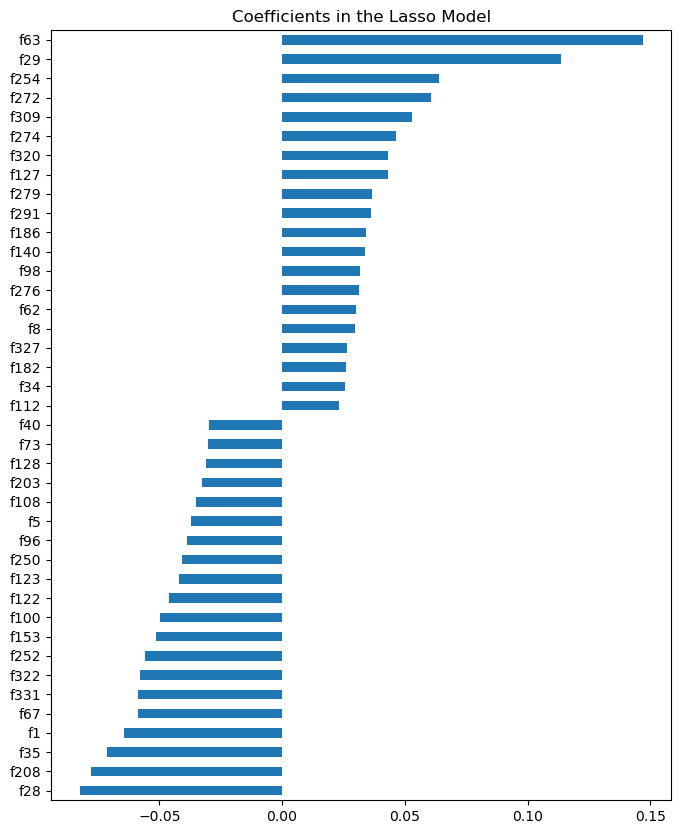

In [348]:
imp_coef = pd.concat([coef.sort_values().head(20),
                     coef.sort_values().tail(20)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

## Model Training
- 다양한 모델들을 통해, 분석하였고 최종적으로 앙상블 모델 boosting 을 선택했습니다. 분류기를 여러개 합쳐, 더 강한 모델을 만드는 방식이며 그 중 Gradient 방식을 사용하는 GradientBoostingClassifier를 선택했습니다.
- RBtree보다 평균적으로 성능이 좋으나, 학습하는 데 비교적 시간이 듭니다. 하지만, 현재의 데이터셋의 규모는 적으므로 GradientBoostingClassifier를 선택했습니다.
- 최종적인 모델은 가장 하단에 존재합니다.


In [349]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [350]:
# msc = MinMaxScaler()
# x = data.drop(labels='answer', axis=1)
# y = data['answer']
# msc.fit(x, y)
# x__ = msc.transform(x)
# print(x.shape)
# print(y.shape)
# X_train, X_test, y_train, y_test = train_test_split(x__, y, test_size=0.3)
# reg = GradientBoostingClassifier(random_state=42)
# reg.fit(X_train, y_train)
# print(accuracy_score(y_test, reg.predict(X_test)))
# _X_train, _X_test, _y_train, _y_test = train_test_split(x, y, test_size=0.3)
# reg2 = GradientBoostingClassifier(random_state=42)
# reg2.fit(_X_train, _y_train)
# print(accuracy_score(_y_test, reg2.predict(_X_test)))

(650, 348)
(650,)
0.9076923076923077
0.8666666666666667


In [351]:
# #임의의 파라미터를 대입.
# model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                            learning_rate=0.1, loss='deviance', max_depth=3,
#                            max_features=None, max_leaf_nodes=None,
#                            min_impurity_decrease=0.0,
#                            min_samples_leaf=1, min_samples_split=2,
#                            min_weight_fraction_leaf=0.0, n_estimators=100,
#                            n_iter_no_change=None,
#                            random_state=4194, subsample=1.0, tol=0.0001,
#                            validation_fraction=0.1, verbose=0,
#                            warm_start=False)
# model

GradientBoostingClassifier(random_state=4194)

In [352]:
# model.fit(X_train, y_train)
# accuracy_score(y_test, model.predict(X_test))

0.9128205128205128

<AxesSubplot:>

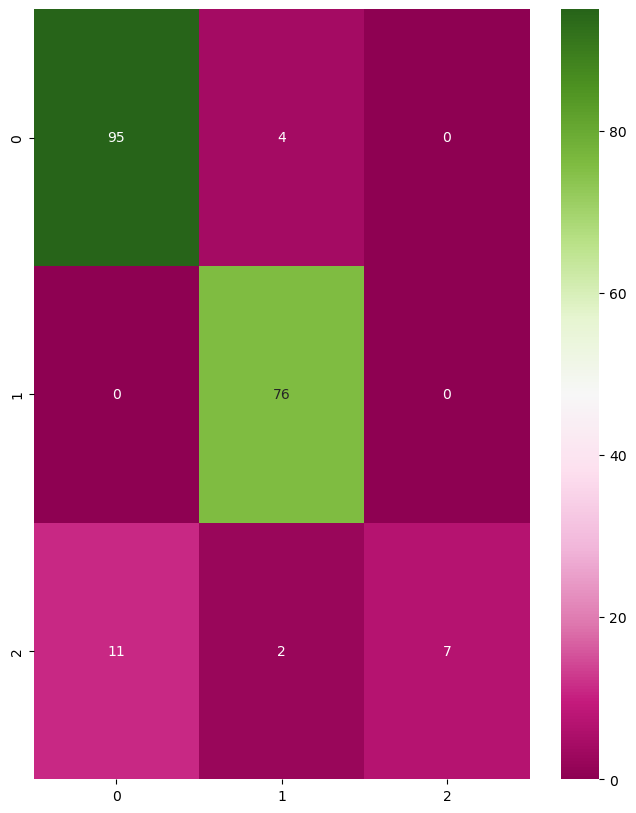

In [353]:
# sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True, cmap="PiYG")

In [354]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.datasets import load_iris
# clf = HistGradientBoostingClassifier(
#                learning_rate=0.1
#                ).fit(X_train, y_train)
# accuracy_score(y_test, clf.predict(X_test))

0.9025641025641026

<AxesSubplot:>

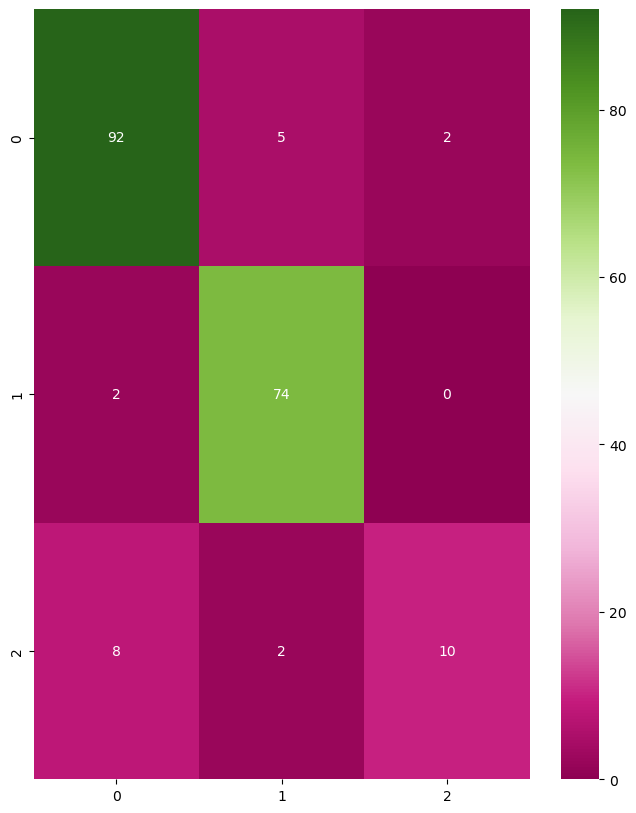

In [355]:
# sns.heatmap(confusion_matrix(y_test,clf.predict(X_test)),annot=True, cmap="PiYG")

In [356]:
# from sklearn.feature_selection import SelectFromModel
# selector = SelectFromModel(GradientBoostingClassifier()).fit(X_train, y_train)

In [357]:
# x_selected = selector.transform(X_train)
# test_x_sel = selector.transform(X_test)
# select = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                            learning_rate=0.1, loss='deviance', max_depth=3,
#                            max_features=1, max_leaf_nodes=None,
#                            min_impurity_decrease=0.0,
#                            min_samples_leaf=1, min_samples_split=2,
#                            min_weight_fraction_leaf=0.0, n_estimators=100,
#                            n_iter_no_change=None,
#                            random_state=4194, subsample=0.8, tol=0.0001,
#                            validation_fraction=0.1, verbose=0,
#                            warm_start=False)
# select.fit(x_selected, y_train)
# print(accuracy_score(y_test, select.predict(test_x_sel)))

0.8923076923076924


<AxesSubplot:>

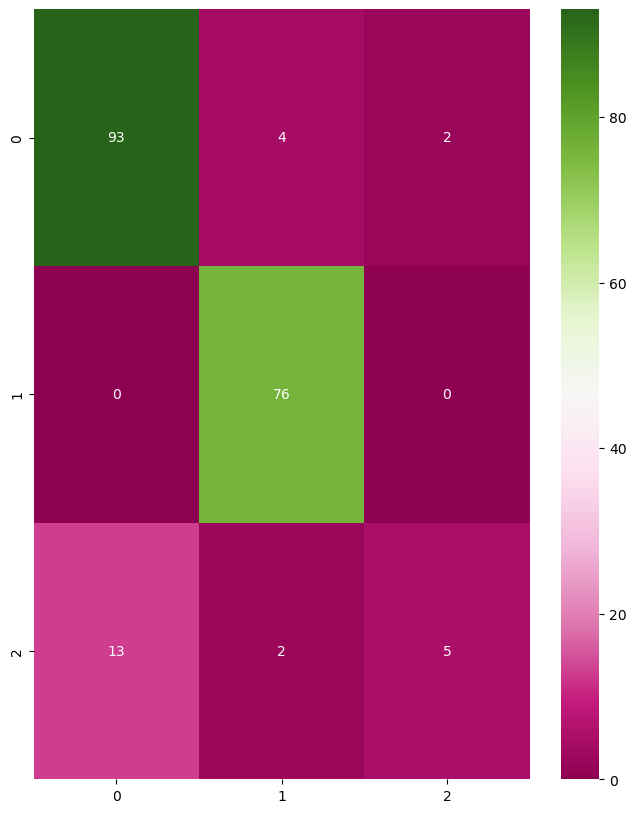

In [359]:
# sns.heatmap(confusion_matrix(y_test,select.predict(test_x_sel)),annot=True, cmap="PiYG")

### 하이퍼파라미터 및 최종 모델

### 최종 transform_test function

In [363]:

def transform_test(X_test_data):
    numeric_feats = X_test_data.dtypes[X_test_data.dtypes != "object"].index
    skewed_feats = X_test_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
    skewed_feats = skewed_feats[abs(skewed_feats) > 0.75].index
    for i in skewed_feats:
        X_test_data[i] = np.log1p(X_test_data[i])
    X_test_data = X_test_data.fillna(X_test_data.mean())
    #X_test_data = msc.transform(X_test_data)
    return X_test_data


In [364]:
data = pd.read_csv(filepath1)
x_data = data.drop(labels="answer", axis=1)
x_data = transform_test(x_data)
y_data = data['answer']
print(x_data.shape + y_data.shape)


/var/folders/w7/s0fpj10s56vggmksv5380b8r0000gn/T/ipykernel_1699/110196328.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_feats = X_test_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


(650, 348, 650)


In [365]:
# from sklearn.model_selection import GridSearchCV
# model = GradientBoostingClassifier()
# model.fit(x_data, y_data)
# param_test = {

#         "n_estimators": range(0, 100, 25),

#         "max_depth": [1, 2, 3, 4],

#         "learning_rate": [0.01, 0.1],

#         "subsample": [0.7, 0.8 , 0.9, 1.0],
# }
# gsearch = GridSearchCV( estimator=model, param_grid=param_test,   scoring="roc_auc", cv=5)
# gsearch.fit(x_data, y_data)
# print(gsearch.best_params_)
# print(gsearch.best_score_)


- 하이퍼 파라미터를 진행시킨 과정, class 3의 개수가 가장 적어 예측하지 못하는 것을 파악할 수 있고 점점 정확도가 증가하는 것을 확인할 수 있음.
- 하이퍼파리미터는 시간이 오래걸려 tpu환경에서 진행했습니다. 아래는 해당 결과를 가져온 사진입니다.

![nn](images/하이퍼파라미터튜닝.png)

하이퍼 파라미터를 통해 추출한 파라미터를 대입하여, 최종모델형성
최종모델은 split 하지 않고, 전체학습.

### 최종 모델

In [366]:
model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.005, 
                           min_samples_leaf=2, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=210,
                           n_iter_no_change=None, 
                           random_state=3969, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model.fit(x_data, y_data)

GradientBoostingClassifier(learning_rate=0.2, max_features='log2',
                           min_impurity_decrease=0.005, min_samples_leaf=2,
                           min_samples_split=7, n_estimators=210,
                           random_state=3969)

## Analysis 
- 기존의 acc를 통해 모델링의 결과를 분석했으니, Confusion matrix를 통해 재확인. 위의 하이퍼파라미터의 학습경과를 확인하며, 어떤 class를 예측하기 어려운지 파악했습니다.
* 하이퍼파라미터 이전 train_test_set으로 분리했던 모델로 진행.(하이퍼파라미터를 통한 최종모델은 모든 데이터셋을 학습시켰기에, 분석불가능)
- 모델을 통해 추측한 결과 class가 가장 많았던 1에 대한 acc가 상당히 높은 것을 확인할 수 있고, 반면 class 3과 같은 경우, 3이 아닌 1로 예측하는 경우가 빈번한 것을 확인할 수 있다.
- 최종적으로는 class 1의 정확도를 떨어뜨리지 않으면서, 3에 대한 적중도를 키워야한다.

<AxesSubplot:>

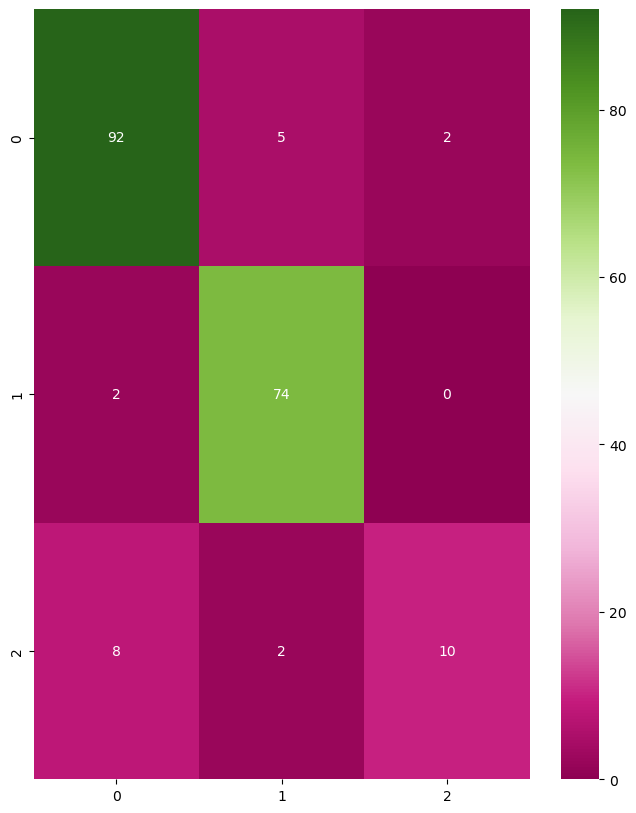

In [367]:
# from sklearn.metrics import confusion_matrix
# sns.heatmap(confusion_matrix(y_test,clf.predict(X_test)),annot=True, cmap="PiYG")

/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='answer', ylabel='count'>

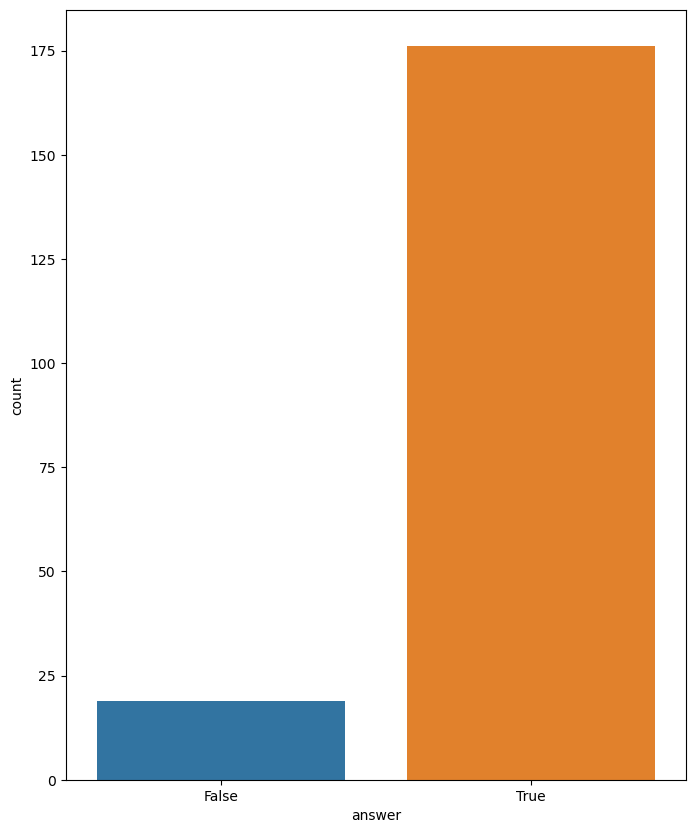

In [368]:
# sns.countplot(y_test == clf.predict(X_test))

# Test data

* TA will check your model's test data accuracy
* (Important) Do not change the code below

In [369]:
filepath = os.sep.join( ['data', 'music_test_data.csv'])
t_data = pd.read_csv(filepath)
features = t_data.columns
X_t_data = t_data[features]
X_t_data = transform_test(X_t_data)
y_pred = model.predict(X_t_data)
np.savetxt('out.txt', y_pred, fmt='%d', delimiter='\n')

/Users/handongmin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
